In [23]:
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [8]:
baseDir = '/home/ayliyim/archive/personal/ayliyim/210528'
dataDir=baseDir+'/data/pbmc3k/filtered'

In [9]:
counts_matrix = scipy.io.mmread(dataDir + '/matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(dataDir + '/genes.tsv', delimiter='\t', column=1))
cb = np.loadtxt(dataDir+'/barcodes.tsv', dtype="str")

In [11]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

In [12]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 41.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.5%
Elapsed time: 12.0 seconds


In [13]:
doublet_scores

array([0.10576385, 0.07329619, 0.05050505, ..., 0.01123195, 0.00853842,
       0.05595409])

In [14]:
predicted_doublets

array([False, False, False, ..., False, False, False])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

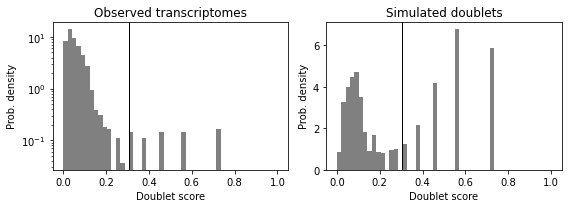

In [15]:
scrub.plot_histogram()

In [16]:
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

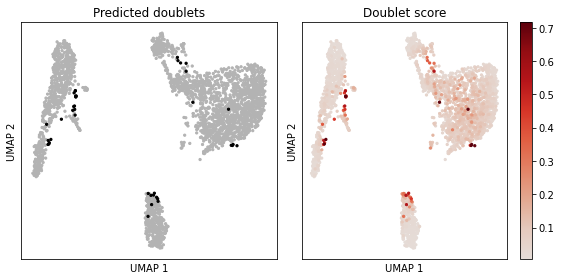

In [17]:
scrub.plot_embedding('UMAP', order_points=True);

In [20]:
len(doublet_scores)

2700

In [21]:
counts_matrix.shape

(2700, 32738)

In [22]:
counts_matrix

<2700x32738 sparse matrix of type '<class 'numpy.float64'>'
	with 2286884 stored elements in Compressed Sparse Column format>

In [40]:
[cb, doublet_scores, predicted_doublets]

[array(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1', ...,
        'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1', 'TTTGCATGCCTCAC-1'],
       dtype='<U16'),
 array([0.10576385, 0.07329619, 0.05050505, ..., 0.01123195, 0.00853842,
        0.05595409]),
 array([False, False, False, ..., False, False, False])]

In [44]:
scrublet_summary = pd.DataFrame({'CB':cb, 'Doublet scores':doublet_scores, 'Predicted doublets': predicted_doublets})
scrublet_summary

,CB,Doublet scores,Predicted doublets
0,AAACATACAACCAC-1,0.105764,False
1,AAACATTGAGCTAC-1,0.073296,False
2,AAACATTGATCAGC-1,0.050505,False
3,AAACCGTGCTTCCG-1,0.062164,False
4,AAACCGTGTATGCG-1,0.025448,False
...,...,...,...
2695,TTTCGAACTCTCAT-1,0.021917,False
2696,TTTCTACTGAGGCA-1,0.062164,False
2697,TTTCTACTTCCTCG-1,0.011232,False
2698,TTTGCATGAGAGGC-1,0.008538,False
